## 手动构建QFT

In [1]:
import numpy as np
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

def qft_rotations(circuit,n):
    if n==0:
        return circuit
    
    n-=1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit),n,qubit)

    qft_rotations(circuit,n)

def swap_registers(circuit,n):
    for qubit in range(n//2):
        circuit.swap(qubit,n-qubit-1)
    return circuit

def qft(circuit,n):
    qft_rotations(circuit,n)
    swap_registers(circuit,n)
    return circuit

量子傅里叶变换电路:


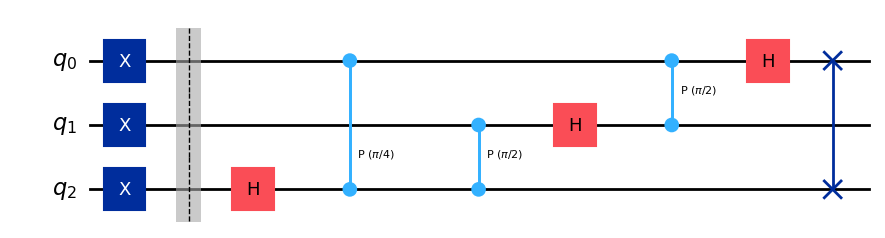


最终状态向量:


<IPython.core.display.Latex object>

In [2]:
from qiskit.quantum_info import Statevector

n_qubits=3
qc=QuantumCircuit(n_qubits)
qc.x([0,1,2])  #|110>
qc.barrier()
qft(qc,n_qubits)

print("量子傅里叶变换电路:")
display(qc.draw('mpl', fold=-1))

state = Statevector(qc)
print("\n最终状态向量:")
display(state.draw('latex'))

C:\Users\22595\AppData\Local\Temp\ipykernel_28480\1351735523.py:7: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_gate=QFT(num_qubits=n_qubits,name='QFT')


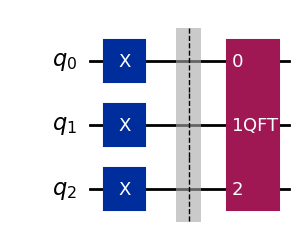


最终状态向量:


<IPython.core.display.Latex object>

In [3]:
from qiskit.circuit.library import QFT 
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

n_qubits=3

qft_gate=QFT(num_qubits=n_qubits,name='QFT')
qc=QuantumCircuit(n_qubits)

qc.x([0,1,2])
qc.barrier()
qc.append(qft_gate,range(n_qubits))

display(qc.draw('mpl'))

state = Statevector(qc)
print("\n最终状态向量:")
display(state.draw('latex'))